# Sampling LHS + Selection MDA

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import qmc
import pandas as pd
import numpy as np

from mda import MaxDiss_Simplified_NoThreshold, Normalize

from LHS import *

## LHS

In [2]:
name_dims=['Hs', 'Tp', 'Dir']
n_dims = len(name_dims) #Number of dimensions

lower_bounds = [0, 2, 1] 
upper_bounds = [10, 25, 360]

n_samples = 10000 #Number of combinations to extract from LHS

In [3]:
sampler = qmc.LatinHypercube(d=n_dims)
dataset = sampler.random(n=n_samples)
dataset = qmc.scale(dataset, lower_bounds, upper_bounds)

In [4]:
DATASET = pd.DataFrame(dataset, columns=name_dims).to_xarray()
DATASET

<xarray.Dataset>
Dimensions:  (index: 10000)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 ... 9993 9994 9995 9996 9997 9998 9999
Data variables:
    Hs       (index) float64 9.985 6.161 7.143 4.327 ... 2.579 2.754 5.853 5.071
    Tp       (index) float64 21.85 24.92 9.199 6.613 ... 19.04 16.2 19.3 16.64
    Dir      (index) float64 80.86 271.9 330.1 58.8 ... 3.581 290.0 238.2 346.7

## MDA

In [5]:
matrix_mda = np.vstack([DATASET.Hs.values, DATASET.Tp.values, DATASET.Dir.values]).T

In [6]:
# subset size, scalar and directional indexes
n_subset = 500   # subset size
ix_scalar = [0, 1]        # x,y,z
ix_directional = [2]      # 

In [7]:
# MDA algorithm
sel = MaxDiss_Simplified_NoThreshold(matrix_mda, n_subset, ix_scalar, ix_directional)


MaxDiss waves parameters: 10000 --> 500



## Plot Centroids

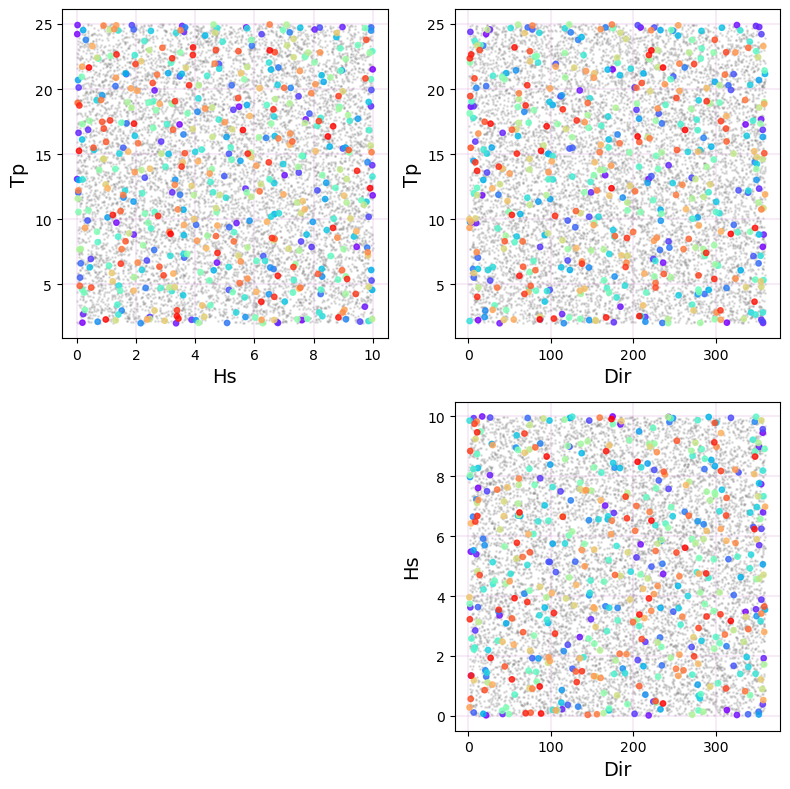

In [8]:
v1, v1_l = matrix_mda[:,0], 'Hs'
v2, v2_l = matrix_mda[:,1], 'Tp'
v3, v3_l = matrix_mda[:,2], 'Dir'

fig = plt.figure(figsize = [8, 8], tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0,0])
ax.scatter(v1,v2,c='grey', s=1, alpha = .2)
ax.set_xlabel(v1_l, fontsize = 14); ax.set_ylabel(v2_l, fontsize = 14)
ax.grid(':', color = 'plum', linewidth=.3)

ax1 = fig.add_subplot(gs[0,1])
ax1.scatter(v3,v2,c='grey', s=1, alpha = .2)
ax1.set_xlabel(v3_l, fontsize = 14); ax1.set_ylabel(v2_l, fontsize = 14)
ax1.grid(':', color = 'plum', linewidth=.3)


ax2 = fig.add_subplot(gs[1,1])
ax2.scatter(v3,v1,c='grey', s=1, alpha = .2)
ax2.set_xlabel(v3_l, fontsize = 14); ax2.set_ylabel(v1_l, fontsize = 14)
ax2.grid(':', color = 'plum', linewidth=.3)


# Selected points
ax.scatter(sel[:,0], sel[:,1], s=15, c=range(len(sel)), alpha=.8, zorder=2, cmap='rainbow')

ax1.scatter(sel[:,2], sel[:,1], s=15, c=range(len(sel)), alpha=.8, zorder=2, cmap='rainbow')

im = ax2.scatter(sel[:,2], sel[:,0], s=15, c=range(len(sel)), alpha=.8, zorder=2, cmap='rainbow')
